In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Random forest, svr, decision tree params adjust and theory randomforest
# testing many dataframe for each model
# eda for each solution

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training9.csv")
df.head()
corr=df.corr()

In [3]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [4]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [5]:
model=RandomForestRegressor()

In [6]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [8]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,30310.426093,41797.768915,0.772232
1,11,29956.424702,41827.870204,0.771904
2,12,29594.003070,41017.882189,0.780653
3,13,29149.230038,40221.265964,0.789090
4,14,28586.525676,39523.705396,0.796342
...,...,...,...,...
105,115,22776.330719,35216.184089,0.838315
106,116,22763.235616,35410.167317,0.836528
107,117,23051.599795,35776.743832,0.833126
108,118,22713.356575,35123.943070,0.839161


In [9]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
18,28,21770.070582,33645.573493,0.852415
16,26,22013.609658,33907.077488,0.850112
25,35,22054.813151,34715.712983,0.842878
15,25,22063.619623,34533.875041,0.844519
88,98,22183.121610,35094.033084,0.839434
...,...,...,...,...
4,14,28586.525676,39523.705396,0.796342
3,13,29149.230038,40221.265964,0.789090
2,12,29594.003070,41017.882189,0.780653
1,11,29956.424702,41827.870204,0.771904


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


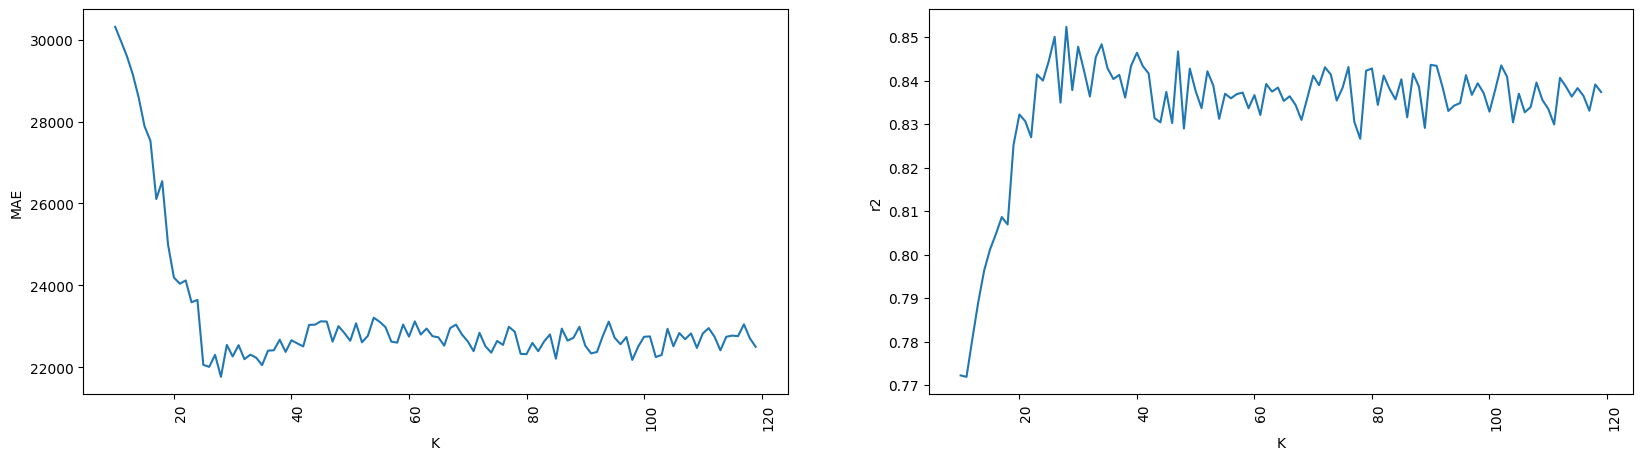

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [11]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               3.261382e-02
LotFrontage              5.107832e-03
LotArea                  2.617346e-02
OverallQual              2.393219e-02
OverallCond              1.685412e-02
                             ...     
SaleCondition_Family     3.132392e-03
SaleCondition_Normal     4.913976e-02
SaleCondition_Partial    2.113360e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [12]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [15]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,22204.477192,35463.681088,0.836034
1,101,22227.542808,35873.484532,0.832223
2,102,21776.334247,34990.488594,0.840380
3,103,22155.587260,35890.238756,0.832066
4,104,22139.741473,35409.519513,0.836534
...,...,...,...,...
395,495,22352.887397,36714.433909,0.824264
396,496,22224.198973,35820.908543,0.832714
397,497,21833.927226,36167.838090,0.829458
398,498,22218.083082,36252.725891,0.828657


In [16]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
32,132,21395.624178,34846.396051,0.841692
148,248,21400.126438,34846.976908,0.841687
236,336,21440.893801,34856.455127,0.841601
14,114,21470.320753,35265.564333,0.837861
132,232,21472.057568,35448.617521,0.836173
...,...,...,...,...
223,323,22527.339110,36341.314920,0.827818
318,418,22556.495890,36441.506670,0.826867
230,330,22567.489726,37051.554614,0.821022
350,450,22575.896336,36755.220968,0.823874


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


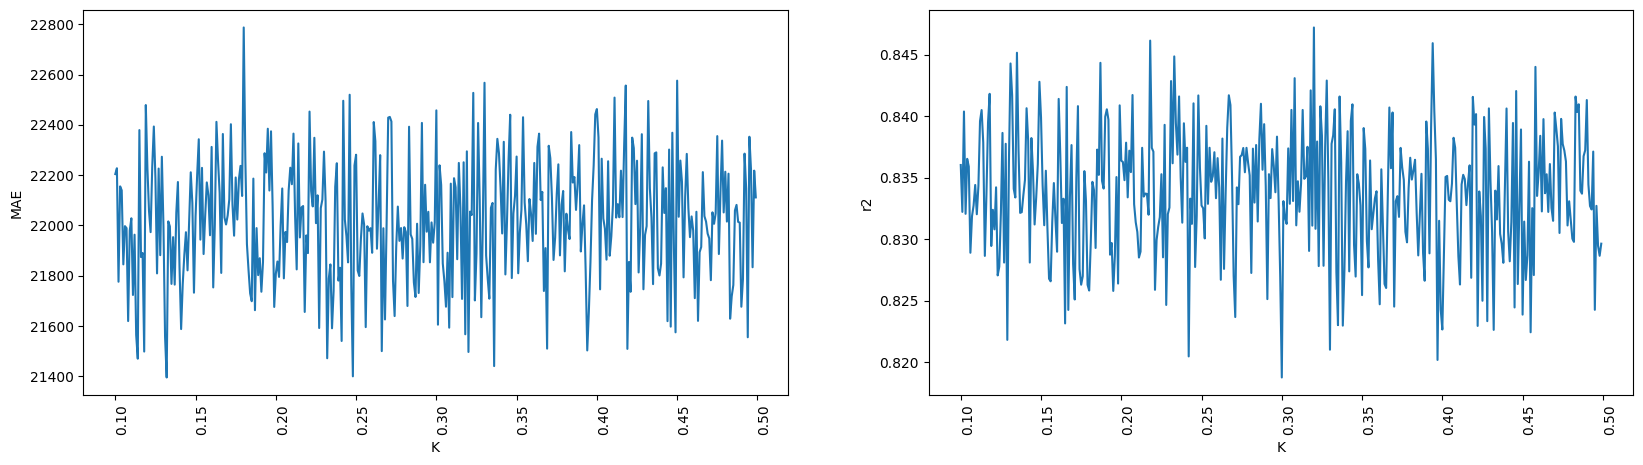

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


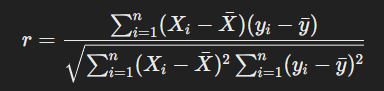

### Using numpy

In [18]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [19]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.0304326175489076


In [20]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [21]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [22]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,37032.105217,52078.209115,0.646411
1,6,36875.231810,53179.174709,0.631303
2,7,33286.184795,47405.872738,0.707012
3,8,31243.895877,42990.767873,0.759045
4,9,30384.769896,42065.005299,0.769310
...,...,...,...,...
110,115,22795.801164,35483.209014,0.835853
111,116,22850.452671,35034.342091,0.839980
112,117,22593.135582,35286.059556,0.837672
113,118,22841.456747,35655.846210,0.834252


In [23]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
19,24,21791.734384,33597.315220,0.852838
26,31,22029.785548,33997.113177,0.849315
33,38,22139.823288,34481.104970,0.844994
32,37,22215.094144,34356.781796,0.846110
103,108,22252.708082,34799.089946,0.842122
...,...,...,...,...
4,9,30384.769896,42065.005299,0.769310
3,8,31243.895877,42990.767873,0.759045
2,7,33286.184795,47405.872738,0.707012
1,6,36875.231810,53179.174709,0.631303


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


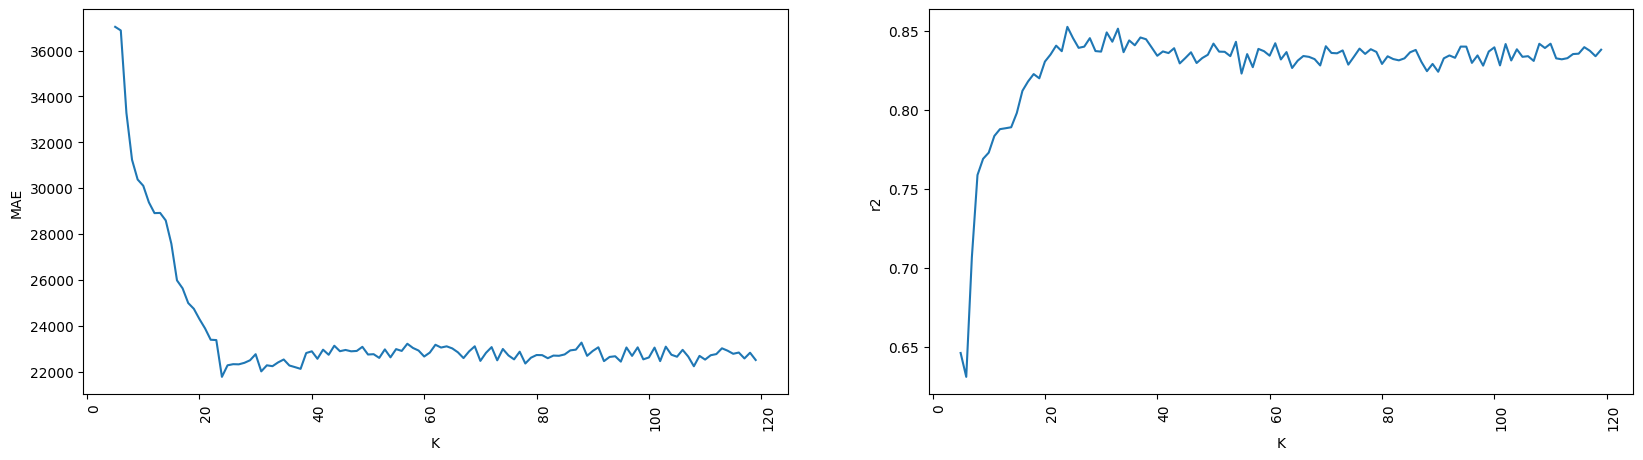

In [24]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

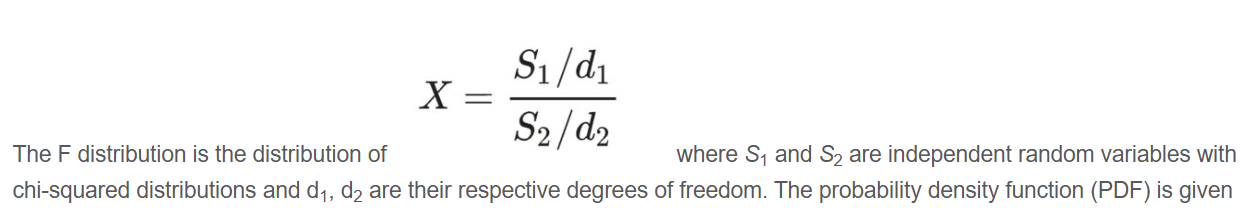

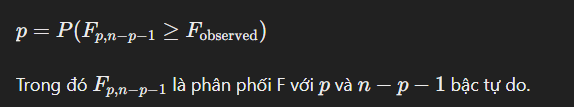

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,34007.329391,48275.831773,0.696159
1,6,33214.231677,47269.983913,0.708689
2,7,31597.778500,45331.489550,0.732092
3,8,31167.792032,45124.650255,0.734531
4,9,31137.454817,44307.734526,0.744056
...,...,...,...,...
110,115,22041.624075,35821.722061,0.832706
111,116,22118.930342,35422.779028,0.836412
112,117,21134.891541,34791.639010,0.842189
113,118,21899.911404,35848.891391,0.832453


In [27]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
112,117,21134.891541,34791.639010,0.842189
72,77,21437.658767,34319.879460,0.846440
71,76,21443.720514,34122.225726,0.848204
91,96,21541.494692,34927.854278,0.840951
102,107,21636.042945,35213.042748,0.838343
...,...,...,...,...
7,12,31624.629566,46310.979052,0.720389
6,11,31634.499098,45939.287715,0.724859
10,15,32033.721918,46234.741125,0.721309
1,6,33214.231677,47269.983913,0.708689


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


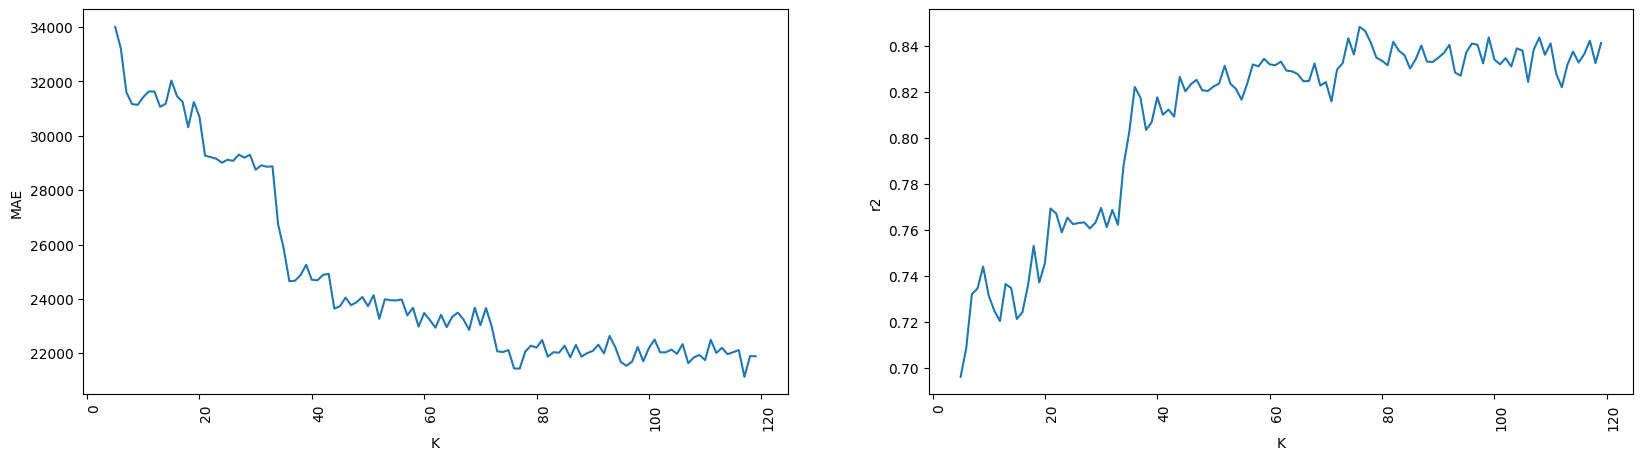

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

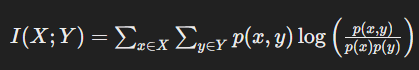

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

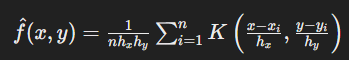

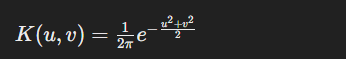

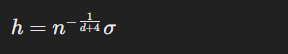

In [29]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,33720.314578,51754.313928,0.650796
1,6,33023.035902,50568.225257,0.666618
2,7,32736.659258,47959.619515,0.700127
3,8,32447.199110,47875.339834,0.701180
4,9,31927.579269,47699.661013,0.703369
...,...,...,...,...
110,115,21502.881986,35420.097055,0.836437
111,116,21719.634966,35302.135954,0.837524
112,117,22144.540582,35947.143642,0.831533
113,118,22541.482774,36976.051661,0.821751


In [32]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
110,115,21502.881986,35420.097055,0.836437
103,108,21511.629726,35045.758657,0.839876
97,102,21586.668390,35693.044502,0.833906
111,116,21719.634966,35302.135954,0.837524
102,107,21724.252774,36412.007630,0.827148
...,...,...,...,...
4,9,31927.579269,47699.661013,0.703369
3,8,32447.199110,47875.339834,0.701180
2,7,32736.659258,47959.619515,0.700127
1,6,33023.035902,50568.225257,0.666618


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_23564\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


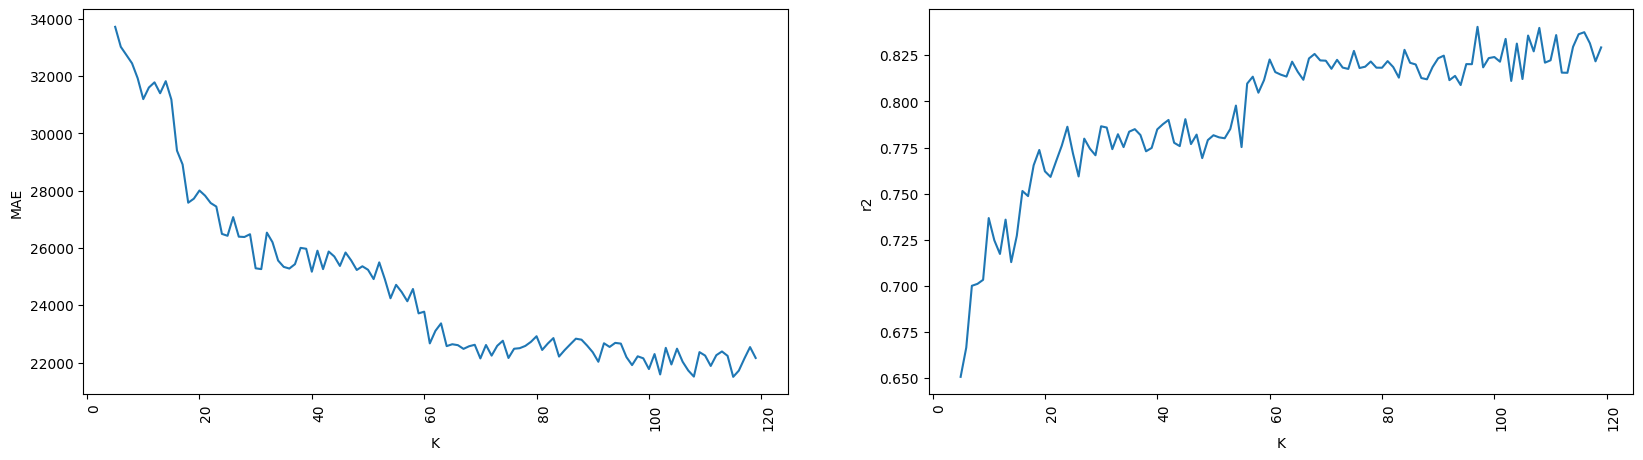

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [35]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365
1,6,22467.487432,36571.365078,0.825631
2,7,22144.440411,35750.971764,0.833367
3,8,21884.749212,35650.797243,0.834299
4,9,21576.374486,35468.768334,0.835987
...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850
111,116,19044.171986,32544.020187,0.861921
112,117,18947.229760,32021.032176,0.866323
113,118,19197.129555,32616.904006,0.861302


In [36]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23700.252911,37418.059496,0.817464
1,6,22717.849384,36141.022713,0.829711
2,7,21964.899110,32265.967403,0.864270
3,8,20352.471370,31322.142697,0.872095
4,9,19864.825000,30886.530579,0.875627
...,...,...,...,...
110,115,18168.850308,29400.927569,0.887304
111,116,18686.510171,31037.095503,0.874412
112,117,18308.297192,29435.314075,0.887040
113,118,18547.187877,30429.399339,0.879282


In [37]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,33720.314578,51754.313928,0.650796
1,6,33023.035902,50568.225257,0.666618
2,7,32736.659258,47959.619515,0.700127
3,8,32447.199110,47875.339834,0.701180
4,9,31927.579269,47699.661013,0.703369
...,...,...,...,...
110,115,21502.881986,35420.097055,0.836437
111,116,21719.634966,35302.135954,0.837524
112,117,22144.540582,35947.143642,0.831533
113,118,22541.482774,36976.051661,0.821751


In [38]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627
...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282


In [39]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464,33720.314578,51754.313928,0.650796
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711,33023.035902,50568.225257,0.666618
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270,32736.659258,47959.619515,0.700127
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095,32447.199110,47875.339834,0.701180
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627,31927.579269,47699.661013,0.703369
...,...,...,...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304,21502.881986,35420.097055,0.836437
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412,21719.634966,35302.135954,0.837524
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040,22144.540582,35947.143642,0.831533
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282,22541.482774,36976.051661,0.821751


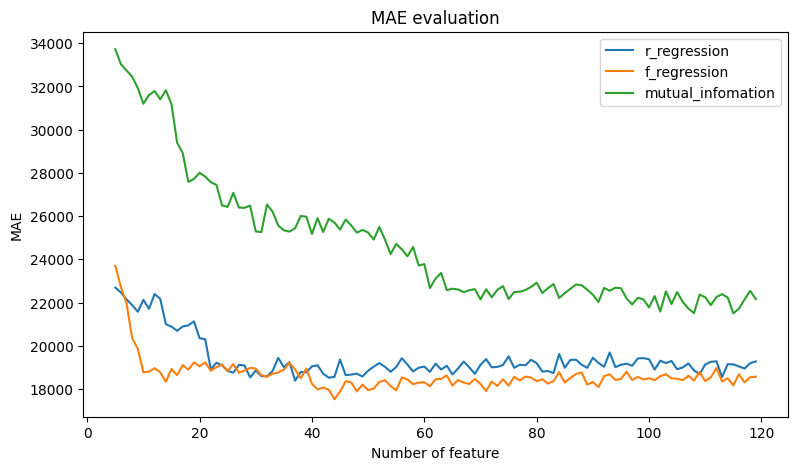

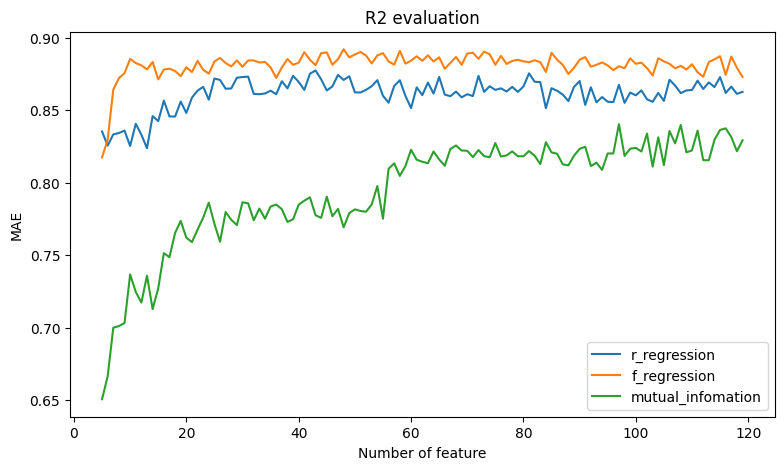

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()